In [316]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import csv
import sys
import os

data = pandas.read_csv("output_final.csv")

#N = 50, pm = 0.01, pc = 0.3, and tournament size at 2.

In [317]:
def graph_lines(data: pandas.DataFrame, t: str, fit: str):
    colors = ["#e60049", "#1a53ff", "#00bc7c", "#e6d800"]
    names = []
    fig, ax = plt.subplots()

    for c,types in enumerate(data[t].unique()):
        names.append(types)

        for i in data["iteration"].unique():
            line = data[(data[t] == types) & (data["iteration"] == i)]
            plt.plot('generation', fit, color=colors[c], data=line, alpha=0.5)

    custom_lines = [Line2D([0], [0], color=c, lw=1) for c in colors]
    plt.title(f"{fit} vs varrying {t}")
    ax.legend(custom_lines, names, title=t)
    plt.savefig(f"figs/{t}_{fit}.pdf")

def graph_heat(data: pandas.DataFrame):
    fig, ax = plt.subplots()
    plt.imshow(data)

def graph_scatter(data: pandas.DataFrame, t: str):
    fig, ax = plt.subplots()
    plt.scatter(data[t], data["num_solutions_found"])
    plt.xlabel(f"{t} value")
    plt.ylabel(f"solutions found")
    plt.savefig(f"figs/solutions_by_{t}.pdf")

    

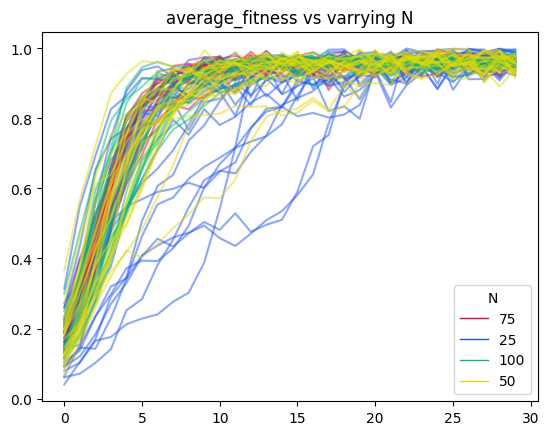

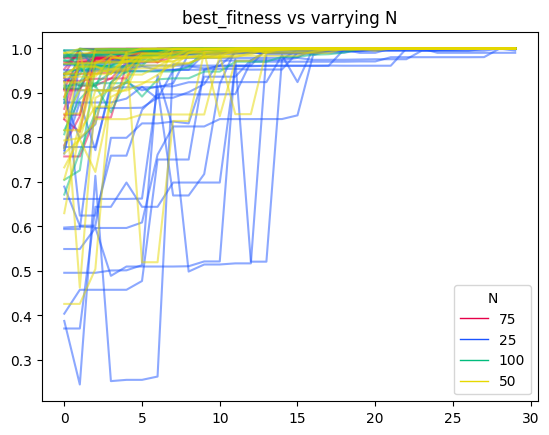

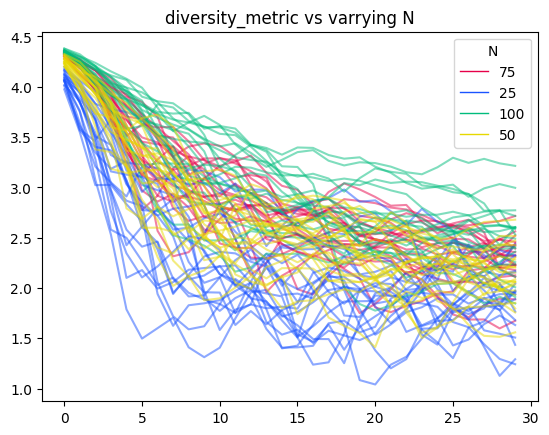

In [318]:
dataN = data[(data["p_m"] == 0.01) & (data["p_c"] == 0.3) & (data["tournament_size"] == 2)]
graph_lines(dataN, "N", "average_fitness")
graph_lines(dataN, "N", "best_fitness")
graph_lines(dataN, "N", "diversity_metric")


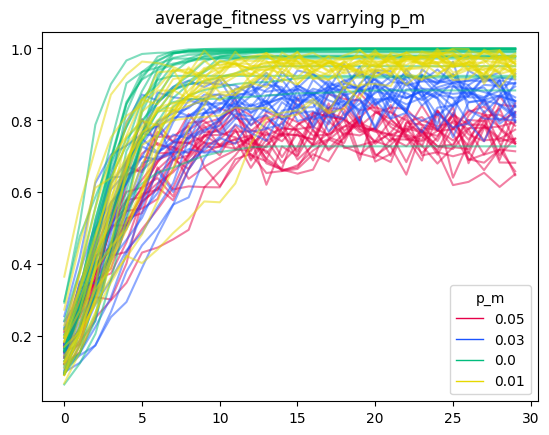

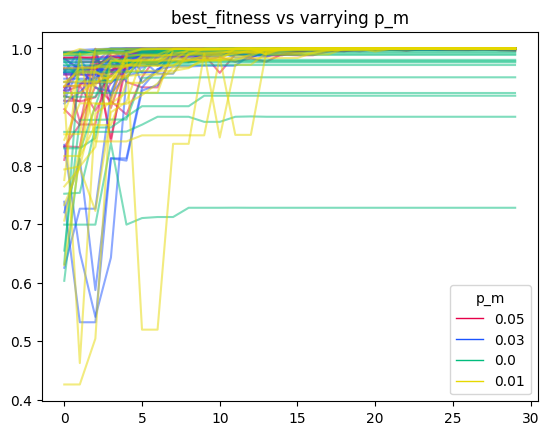

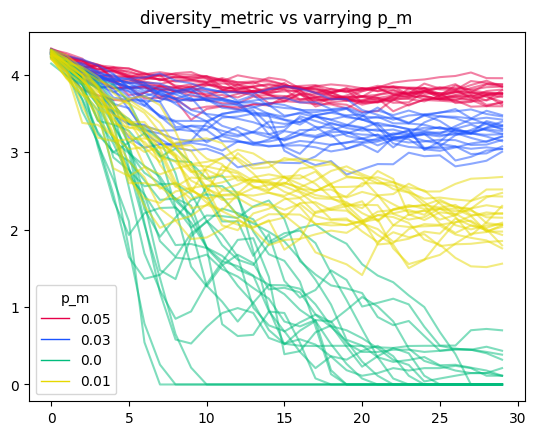

In [319]:
dataPM = data[(data["N"] == 50) & (data["p_c"] == 0.3) & (data["tournament_size"] == 2)]
graph_lines(dataPM, "p_m", "average_fitness")
graph_lines(dataPM, "p_m", "best_fitness")
graph_lines(dataPM, "p_m", "diversity_metric")

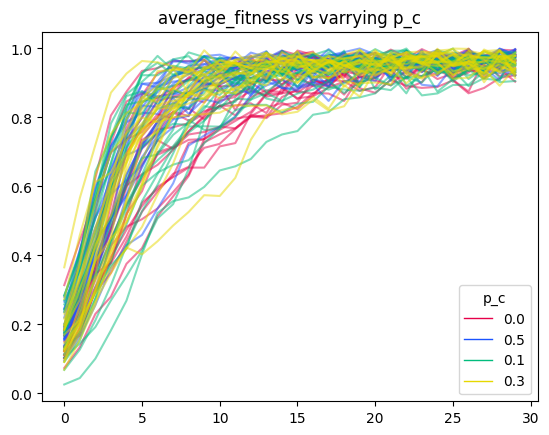

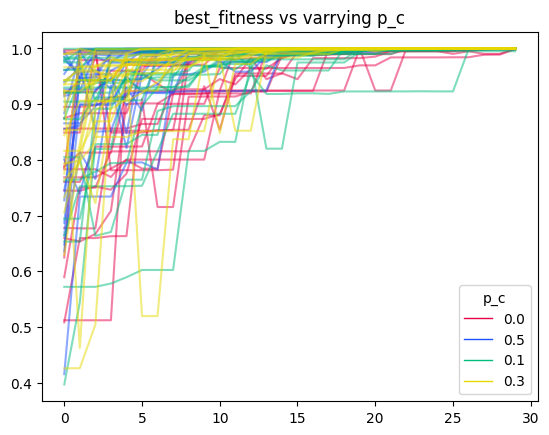

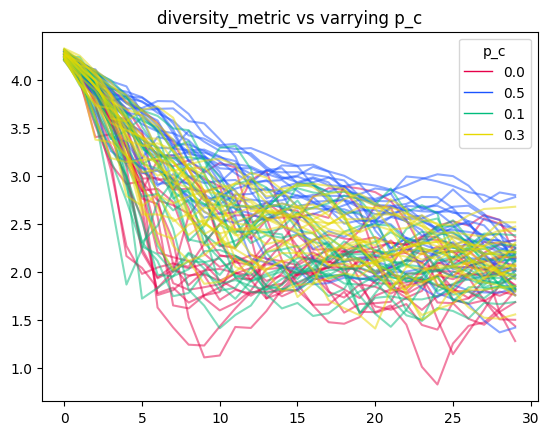

In [320]:
dataPC = data[(data["N"] == 50) & (data["p_m"] == 0.01) & (data["tournament_size"] == 2)]
graph_lines(dataPC, "p_c", "average_fitness")
graph_lines(dataPC, "p_c", "best_fitness")
graph_lines(dataPC, "p_c", "diversity_metric")


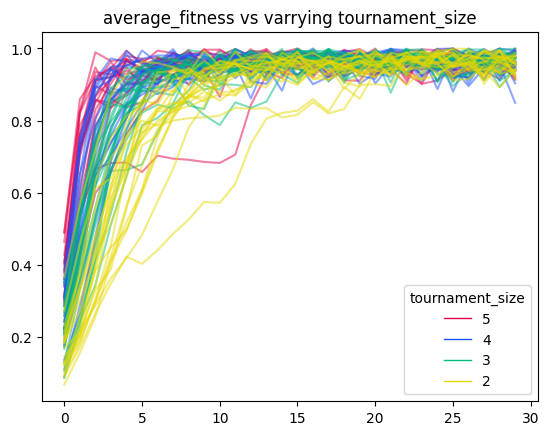

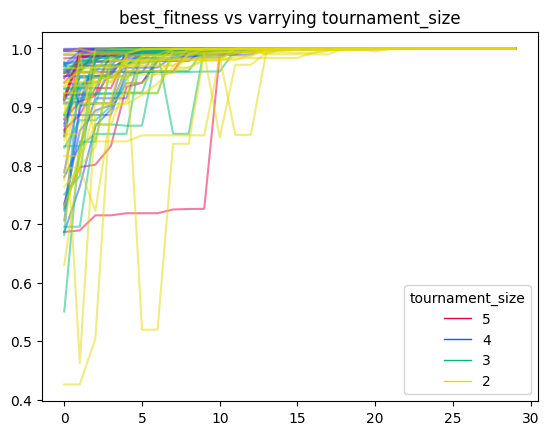

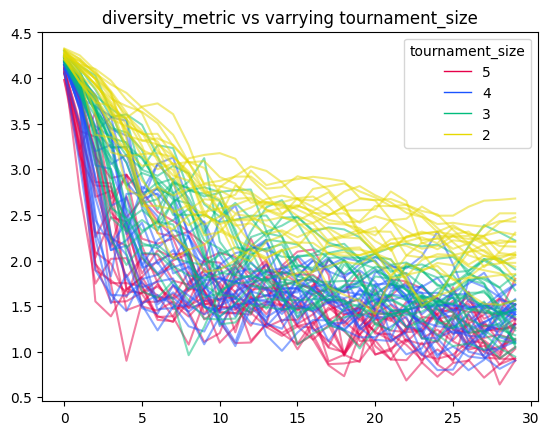

In [321]:
dataT = data[(data["p_m"] == 0.01) & (data["p_c"] == 0.3) & (data["N"] == 50)]
graph_lines(dataT, "tournament_size", "average_fitness")
graph_lines(dataT, "tournament_size", "best_fitness")
graph_lines(dataT, "tournament_size", "diversity_metric")

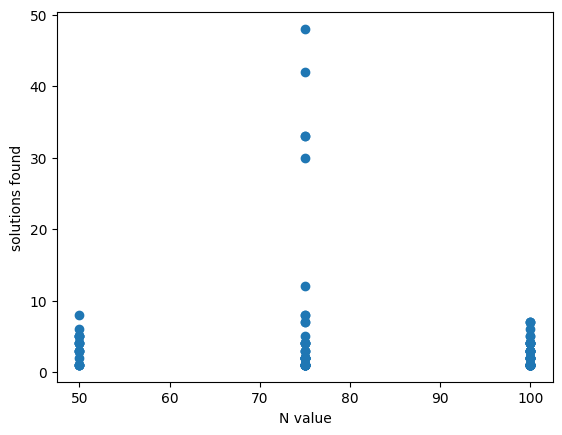

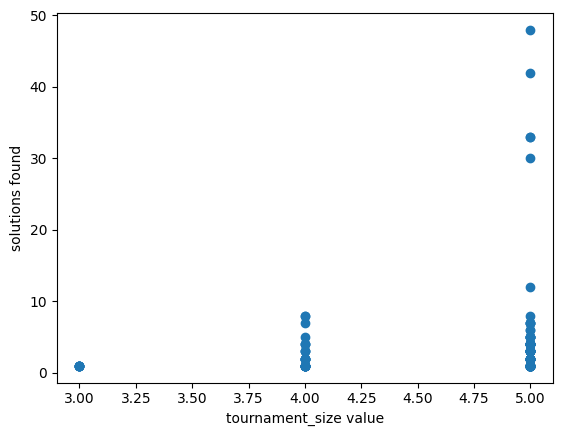

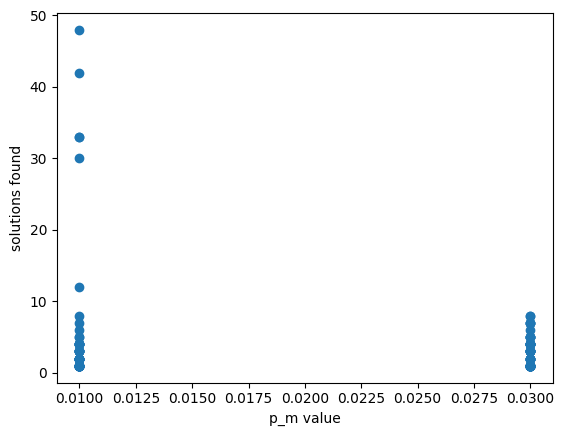

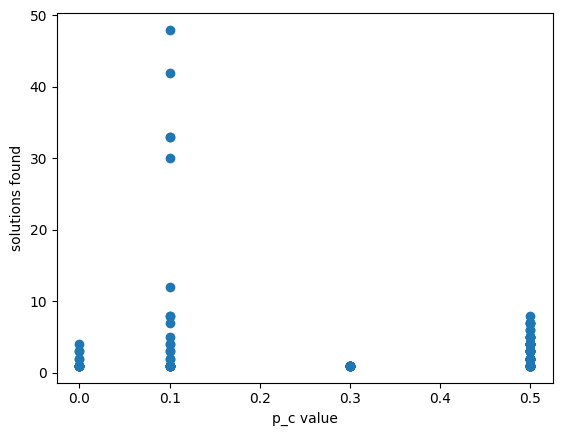

In [322]:
data_best = data[(data["solution_found"] == 1)]
graph_scatter(data_best, "N")
graph_scatter(data_best, "tournament_size")
graph_scatter(data_best, "p_m")
graph_scatter(data_best, "p_c")

